# NOTEBOOK_ML📕
Prévision crédit Immobilier 

In [1]:
import mysql.connector
import pymysql
import sqlite3

In [2]:
data_base = mysql.connector.connect(host="localhost" , user="root" , password="youcef" , database="loan_prediction")
cur = data_base.cursor(buffered=True)
query = "select * from loan_prediction.df_clean_train"
cur.execute(query)
tables = cur.fetchone()

In [3]:
# Importer les packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
# from transformers import pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier , AdaBoostClassifier , StackingClassifier , GradientBoostingClassifier
# from sklearn.metrics import plot_confusion_matrix , classification_report
from scikitplot.estimators import plot_learning_curve
import scikitplot as skplt
from yellowbrick.model_selection import LearningCurve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import FeatureUnion
import pickle

In [4]:
df_clean=pd.read_sql(query , data_base)

C:\Users\simplon\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [5]:
df_clean


,MyUnknownColumn,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
559,609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
560,611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
561,612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
df_clean.head()

,MyUnknownColumn,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
# df_clean.drop(['Loan_ID'], axis=1)

In [11]:
df_clean = df_clean.drop(['Loan_ID', 'MyUnknownColumn'], axis=1)

In [12]:
lBE = LabelEncoder()
categ = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area"]
df_clean[categ] = df_clean[categ].apply(lBE.fit_transform)
df_clean


#def features_encoding(df_clean):
#    lBE = LabelEncoder()
#    categ = ["Loan_Status","Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area"]
#    df_clean[categ] = df_clean[categ].apply(lBE.fit_transform)
#    return df_clean

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
558,1,1,0,0,0,3232,1950.0,108.0,360.0,1.0,0,1
559,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
560,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
561,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [13]:
# sur la target
# df_clean.Loan_Status=df_clean.Loan_Status.map({'Y':1,'N':0})

# Preprocessing

In [14]:
# Convertir le target a une valeur numerique binaire 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_clean['Loan_Status'] = le.fit_transform(df_clean['Loan_Status'])
df_clean.head()


#def target_encoding(df_clean_encoded):
#    le = LabelEncoder()
#    df_clean_encoded['Loan_Status'] = le.fit_transform(df_clean_encoded['Loan_Status'])
#    return df_clean_encoded

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [15]:
X = df_clean.drop(["Loan_Status"], axis=1)
y = df_clean.Loan_Status

In [23]:
# X_train, X_test, y_train, y_test = train_test_split(X , y , random_state = 42, test_size = 0.2)

In [24]:
# X_train.shape

In [25]:
# y_train.shape

In [26]:
# preprocessing_StandardScaler = Pipeline(steps=[
#     ("standardscaler", StandardScaler())])

In [27]:
# # automatise le SMOTE
# Dummy_smote = SMOTE( sampling_strategy='auto')

In [28]:
# DummyPipeline = imbpipeline(steps=[["smote" , Dummy_smote],
#                                ["classifier", DummyClassifier()]])

In [29]:
# fit sur le X et y train
# DummyPipeline.fit(X_train, y_train)

In [30]:
# df_credit.Loan_Status.head(10)

In [16]:
df_clean

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
558,1,1,0,0,0,3232,1950.0,108.0,360.0,1.0,0,1
559,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
560,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
561,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [17]:
df_clean.dropna(inplace=True)


In [18]:
# df_clean[:-2]

In [19]:
y.isnull().sum()

0

In [20]:
# X_train, X_test, y_train, y_test = train_test_split(X , y , random_state = 42, test_size = 0.2)

In [21]:
# X = df_clean.drop(["Loan_Status"], axis=1)
# y = df_clean.Loan_Status

In [22]:
# X_train.shape

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42 )

In [24]:
# y_train = LabelEncoder()
# categ = ['Loan_Status']
# df_clean[categ] = df_clean[categ].apply(lBE.fit_transform)
# df_clean

In [25]:
# ohe = OneHotEncoder(handle_unknown='ignore')
# X_train_ohe=pd.DataFrame(ohe.fit_transform(X_train[["Gender", "Married", "Dependents", "Education", "Self_Employed", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Property_Area"]]).toarray())
# X_train_ohe.columns = ohe.get_feature_names(["Gender", "Married", "Dependents", "Education", "Self_Employed", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Property_Area"])

# X_test_ohe=pd.DataFrame(ohe.transform(X_test[["Gender", "Married", "Dependents", "Education", "Self_Employed", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Property_Area"]]).toarray())
# X_test_ohe.columns = ohe.get_feature_names(["Gender", "Married", "Dependents", "Education", "Self_Employed", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Property_Area"])

# FEATURE SCALING

In [26]:
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [27]:
preprocessing_MinMaxScaler = Pipeline(steps=[
    ("MinMaxscaler", MinMaxScaler())])

In [28]:
# preprocessing_StandardScaler = Pipeline(steps=[
#     ("standardscaler", StandardScaler())])

In [34]:
sm = SMOTE(sampling_strategy='auto')

In [30]:
# colors = ["#69b3a2", "#4374B3"]
# sns.set_palette(sns.color_palette(colors))

# df_clean_value = df_clean['Loan_Status'].value_counts()
# plt.figure(figsize=(8,8))
# plt.pie(df_clean_value,autopct='%1.2f%%',labels=df_clean_value.index)
# plt.show()

# 1) Iteration_DummyClassifier

In [31]:
Dummy_smote = SMOTE(sampling_strategy='auto')

In [32]:
DummyPipeline = imbpipeline(steps=[["smote", Dummy_smote],
                                  ["classifier", DummyClassifier()]])

In [33]:
# LogicReg = Pipeline(steps = [['preprocessing_MinMaxScaler', preprocessing_MinMaxScaler],
#                                     ['classifier', LogisticRegression()]])

In [35]:
pipeline_DC = imbpipeline(steps = [['SMOTE', sm],
                                    ['classifier', DummyClassifier(strategy="uniform")]
                                    ])

In [36]:
pipeline_DC.fit(X_train, y_train)

Pipeline(steps=[('SMOTE', SMOTE()),
                ['classifier', DummyClassifier(strategy='uniform')]])

In [37]:
pipeline_DC = Pipeline(steps = [['preprocessing_MinMaxScaler', preprocessing_MinMaxScaler],
                                    ['classifier', DummyClassifier(strategy="uniform")]
                                    ])

In [38]:
pipeline_DC.fit(X_train, y_train)

Pipeline(steps=[('preprocessing_MinMaxScaler',
                 Pipeline(steps=[('MinMaxscaler', MinMaxScaler())])),
                ['classifier', DummyClassifier(strategy='uniform')]])

In [39]:
print("accuracy train : %.3f"%pipeline_DC.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_DC.score(X_test , y_test))

accuracy train : 0.458
accuracy test : 0.496


In [40]:
y_pred_pipeline_DC = pipeline_DC.predict(X_test) 

In [41]:
print(classification_report(y_test, y_pred_pipeline_DC))

              precision    recall  f1-score   support

           0       0.38      0.47      0.42        38
           1       0.69      0.60      0.64        75

    accuracy                           0.56       113
   macro avg       0.53      0.54      0.53       113
weighted avg       0.59      0.56      0.57       113



# Matrice confusion

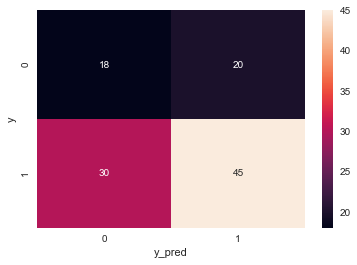

In [42]:
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_pipeline_DC)

# Learning-Curve

<AxesSubplot: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

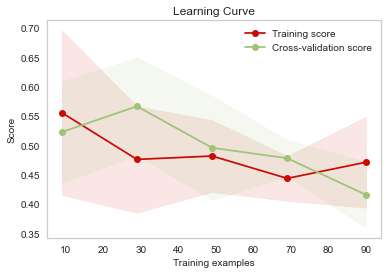

In [43]:
plot_learning_curve(pipeline_DC, X_test , y_test)

# ROC-AUC

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

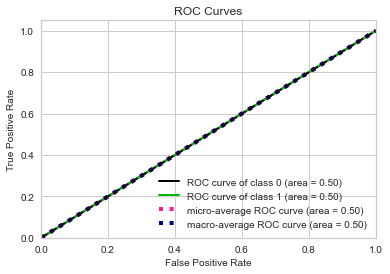

In [44]:
pipeline_DC.fit(X_train, y_train)
y_probas = pipeline_DC.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

# 2) Iteration LogisiticRegression

In [45]:
LogicReg = Pipeline(steps = [['preprocessing_MinMaxScaler', preprocessing_MinMaxScaler],
                                    ['classifier', LogisticRegression()]])

In [46]:
LogicReg.fit(X_train, y_train)

Pipeline(steps=[('preprocessing_MinMaxScaler',
                 Pipeline(steps=[('MinMaxscaler', MinMaxScaler())])),
                ['classifier', LogisticRegression()]])

In [47]:
print("accuracy train : %.3f"%LogicReg.score(X_train, y_train))
print("accuracy test : %.3f"%LogicReg.score(X_test , y_test))   

accuracy train : 0.816
accuracy test : 0.796


In [48]:
y_pred_LogicReg = LogicReg.predict(X_test) 

In [49]:
print(classification_report(y_test, y_pred_LogicReg))

              precision    recall  f1-score   support

           0       1.00      0.39      0.57        38
           1       0.77      1.00      0.87        75

    accuracy                           0.80       113
   macro avg       0.88      0.70      0.72       113
weighted avg       0.84      0.80      0.77       113



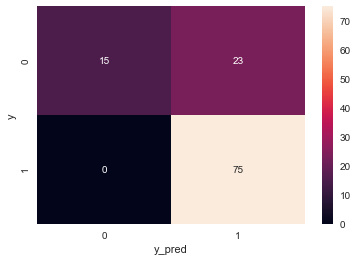

In [50]:
# Matrice confusion
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_LogicReg)

# Learning-Curve

<AxesSubplot: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

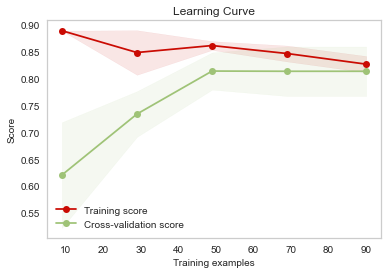

In [51]:
plot_learning_curve(LogicReg,X_test , y_test)

# ROC-AUC

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

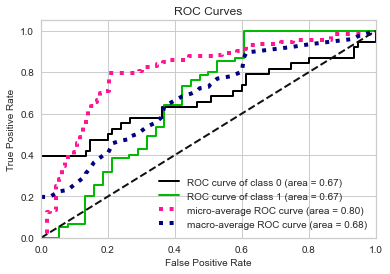

In [52]:
LogicReg.fit(X_train, y_train)
y_probas = LogicReg.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

# 3) Iteration KNeighborsClassifier

In [53]:
KNC = Pipeline(steps = [['preprocessing_MinMaxScaler', preprocessing_MinMaxScaler],
                                    ['classifier', KNeighborsClassifier()]])

In [56]:
y_train.value_counts()

1    314
0    136
Name: Loan_Status, dtype: int64

In [57]:
KNC.fit(X_train, y_train)   

Pipeline(steps=[('preprocessing_MinMaxScaler',
                 Pipeline(steps=[('MinMaxscaler', MinMaxScaler())])),
                ['classifier', KNeighborsClassifier()]])

In [58]:
print("accuracy train : %.3f"%KNC.score(X_train, y_train))
print("accuracy test : %.3f"%KNC.score(X_test , y_test))

accuracy train : 0.820
accuracy test : 0.779


In [59]:
y_pred_KNC = KNC.predict(X_test) 

In [60]:
print(classification_report(y_test, y_pred_KNC))

              precision    recall  f1-score   support

           0       0.88      0.39      0.55        38
           1       0.76      0.97      0.85        75

    accuracy                           0.78       113
   macro avg       0.82      0.68      0.70       113
weighted avg       0.80      0.78      0.75       113



# matrice confusion

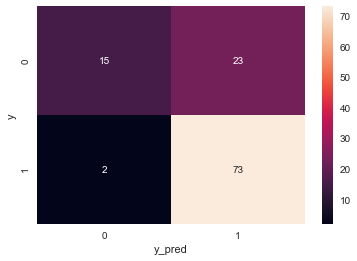

In [61]:
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_KNC)

# learning-Curve

<AxesSubplot: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

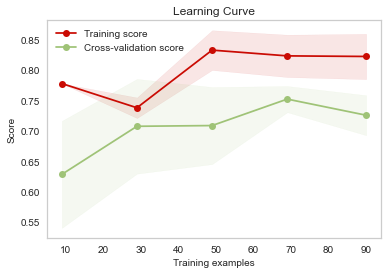

In [62]:
plot_learning_curve(KNC,X_test , y_test)

# roc-auc

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

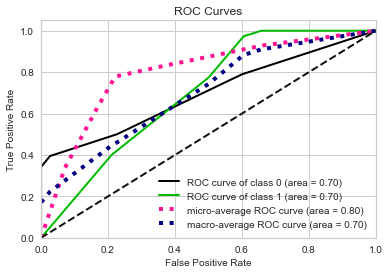

In [63]:
KNC.fit(X_train, y_train) 
y_probas = KNC.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

# 4) Iteration- DecisionTree

In [64]:
DeT = Pipeline(steps = [['preprocessing_MinMaxScaler', preprocessing_MinMaxScaler],
                                    ['classifier', DecisionTreeClassifier()]])

In [65]:
KNC.fit(X_train, y_train)

Pipeline(steps=[('preprocessing_MinMaxScaler',
                 Pipeline(steps=[('MinMaxscaler', MinMaxScaler())])),
                ['classifier', KNeighborsClassifier()]])

In [66]:
print("accuracy train : %.3f"%KNC.score(X_train, y_train))
print("accuracy test : %.3f"%KNC.score(X_test , y_test))

accuracy train : 0.820
accuracy test : 0.779


In [67]:
y_pred_KNC = KNC.predict(X_test) 

In [68]:
print(classification_report(y_test, y_pred_KNC))

              precision    recall  f1-score   support

           0       0.88      0.39      0.55        38
           1       0.76      0.97      0.85        75

    accuracy                           0.78       113
   macro avg       0.82      0.68      0.70       113
weighted avg       0.80      0.78      0.75       113



# matrice confusion

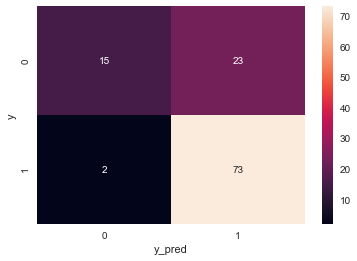

In [69]:
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_KNC)

# learning-Curve

<AxesSubplot: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

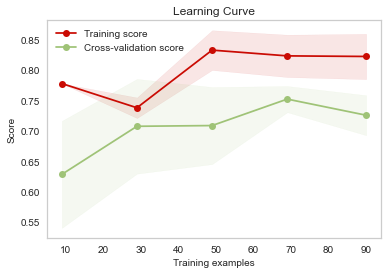

In [70]:
plot_learning_curve(KNC, X_test , y_test)

# roc-auc

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

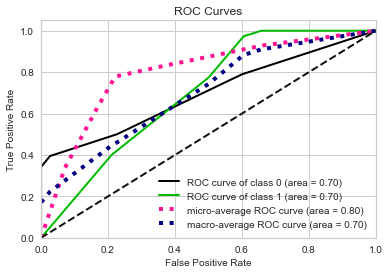

In [71]:
KNC.fit(X_train, y_train)
y_probas = KNC.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

# 5) Iteration-Bagging(RandomForestClassifier)

In [72]:
RFC = Pipeline(steps = [['preprocessing_MinMaxScaler', preprocessing_MinMaxScaler],
                                    ['classifier', RandomForestClassifier()]])

In [73]:
RFC.fit(X_train, y_train)

Pipeline(steps=[('preprocessing_MinMaxScaler',
                 Pipeline(steps=[('MinMaxscaler', MinMaxScaler())])),
                ['classifier', RandomForestClassifier()]])

In [74]:
print("accuracy train : %.3f"%RFC.score(X_train, y_train))
print("accuracy test : %.3f"%RFC.score(X_test , y_test))

accuracy train : 1.000
accuracy test : 0.788


In [75]:
y_pred_RFC = RFC.predict(X_test) 

In [76]:
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

           0       0.89      0.42      0.57        38
           1       0.77      0.97      0.86        75

    accuracy                           0.79       113
   macro avg       0.83      0.70      0.72       113
weighted avg       0.81      0.79      0.76       113



# matrice confusion

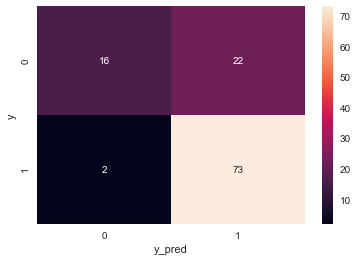

In [77]:
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_RFC)

# learning-Curve

<AxesSubplot: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

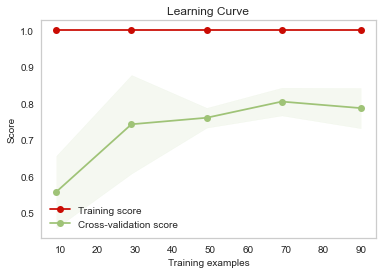

In [78]:
plot_learning_curve(RFC, X_test , y_test)

# roc-auc

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

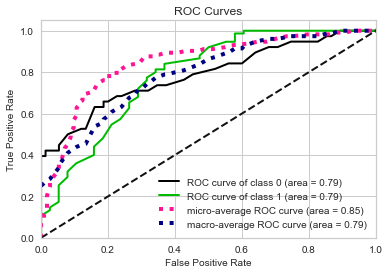

In [91]:
RFC.fit(X_train, y_train)
y_probas = RFC.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

# 6) Iteration-Boosting(GradientBoostingClassifier)

In [81]:
GBC = Pipeline(steps = [['preprocessing_MinMaxScaler', preprocessing_MinMaxScaler],
                                    ['classifier', GradientBoostingClassifier()]])

In [82]:
GBC.fit(X_train, y_train)

Pipeline(steps=[('preprocessing_MinMaxScaler',
                 Pipeline(steps=[('MinMaxscaler', MinMaxScaler())])),
                ['classifier', GradientBoostingClassifier()]])

In [83]:
print("accuracy train : %.3f"%GBC.score(X_train, y_train))
print("accuracy test : %.3f"%GBC.score(X_test , y_test))

accuracy train : 0.904
accuracy test : 0.779


In [84]:
y_pred_GBC = GBC.predict(X_test) 

In [85]:
print(classification_report(y_test, y_pred_GBC))

              precision    recall  f1-score   support

           0       0.81      0.45      0.58        38
           1       0.77      0.95      0.85        75

    accuracy                           0.78       113
   macro avg       0.79      0.70      0.71       113
weighted avg       0.78      0.78      0.76       113



# matrice confusion

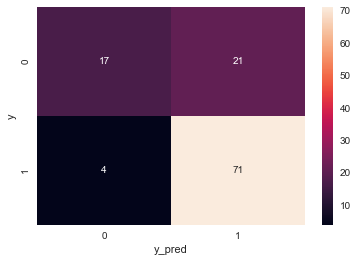

In [86]:
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_GBC)

# learning-Curve

<AxesSubplot: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

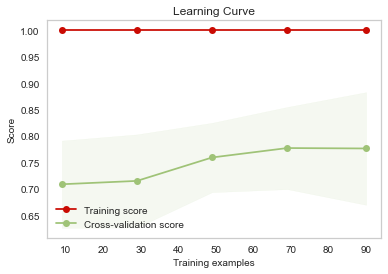

In [87]:
plot_learning_curve(GBC,X_test , y_test)

# roc-auc

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

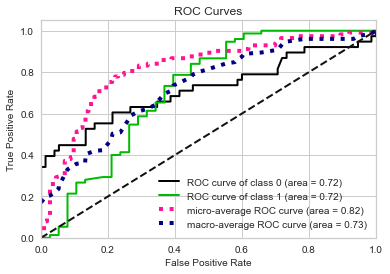

In [88]:
GBC.fit(X_train, y_train)
y_probas = GBC.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

In [89]:
print(X_test)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
250       1        1           0          0              0             2620   
521       1        0           0          0              0             3333   
268       1        1           2          0              0             4400   
55        1        1           0          0              0             3366   
549       1        0           0          0              0             2987   
..      ...      ...         ...        ...            ...              ...   
88        0        1           0          0              0             2484   
320       1        1           0          0              0             2625   
357       1        1           0          0              0             5488   
33        1        1           0          0              0             2275   
244       1        1           2          0              0             4708   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [90]:
prediction = GBC.predict(X_test)

In [91]:
print(prediction)

[1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1
 1 1]


In [92]:
## TAken data from the dataset
t = GBC.predict([[0.0,	0.0,	0.0,	1,	0.0,	1811,	1666.0,	54.0,	360.0,	1.0,	2]])

C:\Users\simplon\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [93]:
print(t)


[1]


In [94]:
# model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
# classify(model, X, y)

In [95]:
# faire une prevision 
# profil_test=[[1,1,1,0,0,0,1,0,1,0,100,0,400,360]]
# RFC.predict(profil_test)

# Enregsiter le modele

In [96]:
# import pickle
# now you can save it to a file
file = 'model.pkl'
with open(file, 'wb') as f:
    pickle.dump(GBC, f)

In [97]:
# now you can save it to a file
# file = './Model/ML_Model1.pkl'
# with open(file, 'wb') as f:
#     pickle.dump(KNC, f)

In [98]:
# enregistrer le modèle
pickle.dump(GBC,open('model.pkl','wb'))

In [99]:
# import pickle
# # now you can save it to a file
# file = './model_pkl.pickle.pkl'
# with open('model_pkl.pickle', 'wb') as file:
#     pickle.dump(svc, f)

In [100]:
# pickle_out = open("classifier.pkl", mode = 'wb')
# pickle.dump(model, pickle_out)
# # pickle_out.close()

In [101]:
# filename="model.pkl"


In [102]:
# import pickle
# with open(filename, 'wb') as f:
#     pickle.dump(RFC, f)

In [103]:
# with open(filename, 'rb') as f:
#     m = pickle.load(f)

# PICKLE

In [104]:
# # Export pipeline as pickle file
# with open("model.pkl", "wb") as file:
#     pickle.dump(pipe_model, file)

# # Load pipeline from pickle file
# my_pipeline = pickle.load(open("model.pkl","rb"))

# # Et on test le score
# my_pipeline.score(X_test, y_test)

In [105]:
# import pickle

with open("model.pkl", "wb") as file:
    pickle.dump(GBC, file)

In [106]:
# with open(file, 'rb') as f:
#     k = pickle.load(f)

In [107]:
# K = k.predict([[0.0,	0.0,	0.0,	1,	0.0,	4230,	0.0,	112.0,	360.0,	1.0,	1]])
# print(K)

# MONITORING

In [108]:
from sqlalchemy import column
from sqlalchemy import create_engine
# sqlalchemy.py 
from sqlalchemy import *


In [109]:
engine=create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}".format
                     (host="localhost",user="root",pw="youcef",db="loan_prediction"))
conne=engine.connect()
X_test.to_sql('ml_pred',conne,if_exists='replace',index = False)

113

In [110]:
import wandb
import random
import time
import wandb
from wandb import AlertLevel

In [111]:
# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="my-awesome-project",
    
    # track hyperparameters and run metadata
    config={
    "learning_rate": 0.02,
    "architecture": "ML",
    "dataset": "CIFAR-100",
    "epochs": 10,
    }
)

# simulate training
epochs = 10
offset = random.random() / 5
for epoch in range(2, epochs):
    acc = 1 - 2 ** -epoch - random.random() / epoch - offset
    loss = 2 ** -epoch + random.random() / epoch + offset
    
    # log metrics to wandb
    wandb.log({"rec": rec, "loss": loss})
    
# [optional] finish the wandb run, necessary in notebooks
wandb.finish()

wandb: Currently logged in as: youcef-boucheta-simplon (youcef-b). Use `wandb login --relogin` to force relogin


NameError: name 'rec' is not defined

In [ ]:
acc = 0.85
threshold = 0.80

if acc < threshold:
    wandb.alert(
        title="Low accuracy", 
        text=f"Recall {acc} is below the acceptable theshold {threshold}",
        level=AlertLevel.WARN,
        wait_duration=300
    )

In [ ]:
# acc = 0.20
if acc < threshold:
    wandb.alert(
        title="Low accuracy", 
        text=f"Recall {acc} is below the acceptable theshold {threshold}",
        level=AlertLevel.WARN,
        wait_duration=300
    )

In [ ]:
wandb.config = {
  "learning_rate": 0.001,
  "epochs": 100,
  "batch_size": 128
}

In [ ]:
# wandb.init(project="offline-demo")

In [ ]:
# for i in range(100):
#   wandb.log({"accuracy": i})

In [ ]:
# for step in range(60):
#     wandb.log({'acc': random.random(), 'loss': random.random()})
#     time.sleep(1)

In [ ]:
wandb.alert(
    title="Low accuracy", 
    text=f"Recall {acc} is below the acceptable threshold {thresh}"
)

In [ ]:
# wandb.log({"loss": loss})

# # Optional
# wandb.watch(model)